# Capstone Project: Consumer Insights for Beats by Dre

##  **Title Page**
**Project Title:** Consumer Insights Data Analytics Externship of Beats by Dre  
**Student Name:** Joan David  
**Date:** October 7, 2024

##  **Table of Contents**
1. Introduction
2. Data Description
3. Exploratory Data Analysis (EDA)
4. Sentiment Analysis
5. AI-Generated Insights
6. Comparative Analysis
7. Conclusion
8. References

## 1. Introduction

### 1.1 Project Overview
The purpose of this project is to analyze consumer feedback in order to identify trends, opportunities and areas for improvement in Beats products. This analysis aims to provide actionable insights that will inform product development, marketing strategies, enhance consumer experience and ultimately drive business growth.

---

### Key Objectives

- Evaluate product performance
- Analyze consumer feedback
- Correlation analysis
- Insights generation

### 1.2 Background
Beats by Dre is a leading audio products manufacturer with strong presence in the tech industry. In today's digital age, customer opinions and sentiments are important in shaping the reputation and success of any brand. In the tech industry most especially, where competition is fierce and customer loyalty is difficult to maintain, understanding consumer sentiment is crucial.

By analyzing consumer sentiments, Beats by Dre can gain valuable imsights into market trends, consumer preferences, and product performance. This enables data-driven decision-making and ensures that Beats stays ahead of competition and meets consumer needs at all times.

## 2. Data Description

### 2.1 Data Sources
The data source for this analysis includes consumer reviews collected from Amazon; an e-commerce website. The total sample size for this analysis is about 1000+ data points.

### 2.2 Data Collection Process
The data was collected through scraping using Oxylabs' scraper APIs. Reviews from 12 different products were gathered and loaded into a single csv file.

While data is usually of high quality, there were some missing values and duplicates in the data set which I handled in the cleaning process

---
I made use of the reference data set provided in the student platform to save time and to ensure that the data provided was genuine, I compared it with actual results from Amazon website.

To import my data, I ran the following lines of code;

In [ ]:
! pip install pandas

In [ ]:

import pandas as pd
import csv

file_path= '/content/reference_dataset_for_beats_externship.csv'
with open(file_path, 'r') as file:
  data= csv.reader(file)

### 2.3 Data Cleaning
This data had missing values and it was provided with customer reviews about different products. I wanted to stick to Bluetooth speakers from different brands. This required a lot of cleaning. Here are the lines of code I ran to achieve that.

In [ ]:
data= pd.read_csv('reference_dataset_for_beats_externship.csv', encoding='latin-1',on_bad_lines='skip')
data.head()

,Unnamed: 0,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,0,RUE030N50F9EJ,B09PYVXXW5,5.0 out of 5 stars Really good with a couple o...,CTM,5,I love TWS earbuds. I have many including buds...,"Reviewed in the United States May 14, 2022",AEGYSY5H3ZUJC4SGGPRM3Z2OE5PA,1.0,32.0,Color: Black
1,1,R385JSD6KWP2QU,B09PYVXXW5,4.0 out of 5 stars I wish I could rate 5 stars...,Gianna,4,&I just cant. Because as useful as these earb...,"Reviewed in the United States July 22, 2023",AHINA7A6O2I5RZSNAY4OWYN4QXVA,1.0,31.0,Color: Red
2,2,R1UB1V4EPP9MN3,B09PYVXXW5,"5.0 out of 5 stars Basically perfect, fantasti...",Colin M.,5,I needed a replacement for my Galaxy buds pro'...,"Reviewed in the United States August 18, 2022",AFG2T5XGMQCACK7JBDRHKEKWJLPA,1.0,21.0,Color: Red
3,3,RWYK1GXIVV6H1,B09PYVXXW5,1.0 out of 5 stars Decent but Defective,Aquila,1,"UPDATE 6/24/22: As of 6/23/22, my replacement ...","Reviewed in the United States June 3, 2022",AGFUWY2GO4HF5RMLUR7ZOSKID4KA,1.0,9.0,Color: Black
4,4,R3FBQBGQM3II4W,B09PYVXXW5,3.0 out of 5 stars I went with soundcore instead,Frankie,3,So out of the box these tiny buds surprised me...,"Reviewed in the United States October 28, 2022",AEOFU2SCDWYLS6DTSXIR6FWMRQMQ,1.0,7.0,Color: Black


To identify reviews based on the Bluetooth speaker and brand name, i conducted product mapping, replacing the product ASINs with the name of the brand.

In [ ]:
product_mapping ={
    'B0CXL4FQBK': 'Sony ULT Field 1 Wireless Bluetooth Speaker',
    'B099TJGJ91': 'Bose Soundlink black Bluetooth Speaker',
    'B0D4SX9RC6': 'Beats Pill black Bluetooth Speaker',
    'B0B44F1GGK': 'Sony SRS XE 200 X Series Bluetooth Speaker',
    'B08X4YMTPM': 'JBL Charge 5 Bluetooth Speaker',
    'B0BG93TZ5N': 'Tronmart Bang SE Bluetooth Speaker',
    'B0CY6S748H': 'Sonos Roam 2 Bluetooth Speaker',
    'B07GWRCZQP': 'JBL Charge 4 Bluetooth Speaker',
    'B0B43Y8GHZ': 'Sony SRS X300 Bluetooth Speaker',
    'B0B445JCZ3': 'Sony SRS XE300 Bluetooth Speaker',
    'B099TLMRBG': 'Bose Soundlink Flex white Bluetooth Speaker',
    'B0D4STD5ZC': 'Beats Pill red Bluetooth Speaker',
    'B09GK5JMHK': 'JBL Flip 6 Bluetooth Speaker',
    'B09XXW54QG': 'Marshall Emberton Bluetooth Speaker'
}
data['product_name'] = data['product_id'].map(product_mapping)
data.to_csv('updated_dataset.csv', index=False)

As seen here, a new 'product name' column has been added.

In [ ]:
data.columns

Index(['Unnamed: 0', 'review_id', 'product_id', 'title', 'author', 'rating',
       'content', 'timestamp', 'profile_id', 'is_verified', 'helpful_count',
       'product_attributes', 'product_name'],
      dtype='object')

I proceeded to drop all missing values. My aim for this other than cleaning the data was to drop all values that did not contain the product name. This made my analysis easier.

In [ ]:
data= pd.read_csv('updated_dataset.csv')

In [ ]:
data_dropped=data.dropna(inplace=True)
print('DataFrame after dropping null values:\n', data_dropped)

DataFrame after dropping null values:
 None


Next was to check if there were any duplicates and there was none.

In [ ]:
duplicates= data.duplicated()
print('Duplicate rows:\n', duplicates)

Duplicate rows:
 1003    False
1004    False
1005    False
1006    False
1007    False
        ...  
4957    False
4958    False
4959    False
4960    False
4961    False
Length: 1134, dtype: bool


In [ ]:
data.to_csv('updated_reviews.csv', index=False)


In [ ]:
data=  pd.read_csv('updated_reviews.csv')
data.tail()

,Unnamed: 0,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes,product_name
1129,5865,R2YE8KKVZGETCW,B0CY6S748H,4.0 out of 5 stars Quality speaker,SC,4,OK I'll start with the elephant in the room......,"Reviewed in the United States June 12, 2024",AGSZPUV3HVYEEYXWLNDAMC4ODM5Q,0.0,0.0,Color: Black,Sonos Roam 2 Bluetooth Speaker
1130,5889,RERGCQ3PLJUTJ,B0CY6S748H,1.0 out of 5 stars Buyer beware WiFi connectio...,Road Runner,1,"I bought this speaker 6 months ago, barely use...","Reviewed in the United States June 2, 2024",AEGCJLZHMRVLF55FNZBSFVM2Y5PA,0.0,0.0,Color: White,Sonos Roam 2 Bluetooth Speaker
1131,5890,R25VEKRF5EV836,B0CY6S748H,1.0 out of 5 stars Horrible service,Linda T.,1,I could not link to other Sonos Roam speakers ...,"Reviewed in the United States May 24, 2024",AEECURQVZUBV4HKCK3M74UANCFKA,0.0,0.0,Color: Black,Sonos Roam 2 Bluetooth Speaker
1132,5891,R34PNR72XAULLC,B0CY6S748H,1.0 out of 5 stars Cannot pair two of these wi...,jdawz,1,"Amazing that they made an outdoor, portable wa...","Reviewed in the United States May 22, 2024",AFNED7OI2U3V2GPP6XHXMYQY5R6Q,0.0,0.0,Color: White,Sonos Roam 2 Bluetooth Speaker
1133,5892,R1GHYH6N4V9BRB,B0CY6S748H,1.0 out of 5 stars Spotty Qi charging and conn...,TheMeiers,1,Not consistent qi charging and bluetooth a pai...,"Reviewed in the United States May 24, 2024",AFW6USPKXJEMNISGCXPG2BFMALAQ,0.0,0.0,Color: Black,Sonos Roam 2 Bluetooth Speaker


## 3. Exploratory Data Analysis (EDA)

### 3.1 Data Overview
This dataset contains 1000+ data points representing the consumer reviews of different brands of bluetooth speakers. Below are the relevant statistics that provide an overview of the data set.

**Central Tendency Measures**

- Mean: Indicating ratings on an average of each product
- Mode: Indicating the frequency or number of occurrences of each product in this dataset
- MedianL: Indicating the middle value in the dataset

**Dispersion Measures**
- Standard deviation
- Variance

In [ ]:
import numpy as np
import pandas as pd
data=pd.read_csv('updated_reviews.csv')

In [ ]:
mean_rating= data['rating'].mean()
mode_rating= data['rating'].mode()[0]
median_rating= data['rating'].median()
variance_rating= data['rating'].var()
std_rating= data['rating'].std()

print("mean rating:", mean_rating)
print("mode rating:", mode_rating)
print("median rating:", median_rating)
print("variance rating:", variance_rating)
print("standard deviation rating:", std_rating)

mean rating: 4.48941798941799
mode rating: 5
median rating: 5.0
variance rating: 1.0550512055366335
standard deviation rating: 1.027156855371483


These reprsent the average, mode, median, variance, and standard deviation computations of all the ratings in my dataset. However, I want to focus on the average ratings of each product to conduct my analysis.

In [ ]:
mean_ratings= data.groupby('product_name')['rating'].mean()
print(mean_ratings)

product_name
Beats Pill black Bluetooth Speaker             4.456140
Beats Pill red Bluetooth Speaker               4.509091
Bose Soundlink black Bluetooth Speaker         4.850000
JBL Charge 4 Bluetooth Speaker                 4.868687
JBL Charge 5 Bluetooth Speaker                 4.880342
JBL Flip 6 Bluetooth Speaker                   4.909091
Marshall Emberton Bluetooth Speaker            4.752212
Sonos Roam 2 Bluetooth Speaker                 3.555556
Sony SRS X300 Bluetooth Speaker                4.435644
Sony SRS XE 200 X Series Bluetooth Speaker     3.780000
Sony SRS XE300 Bluetooth Speaker               4.000000
Sony ULT Field 1 Wireless Bluetooth Speaker    4.666667
Name: rating, dtype: float64


I have been able to calculate the mean/average ratings of each product. My derivation from these results is that according to their occurrences in this dataset, JBL seems like a powerful competitor, having ratings surpassing a 4.5/5 in all 3 of their products. Beats Pill also comes close with over 4.0/5 ratings on two of their products present in this dataset.

### 3.2 Visualizations
I made use of the following to visualize relevant information about my data:
- Line graph
- Bar Chart

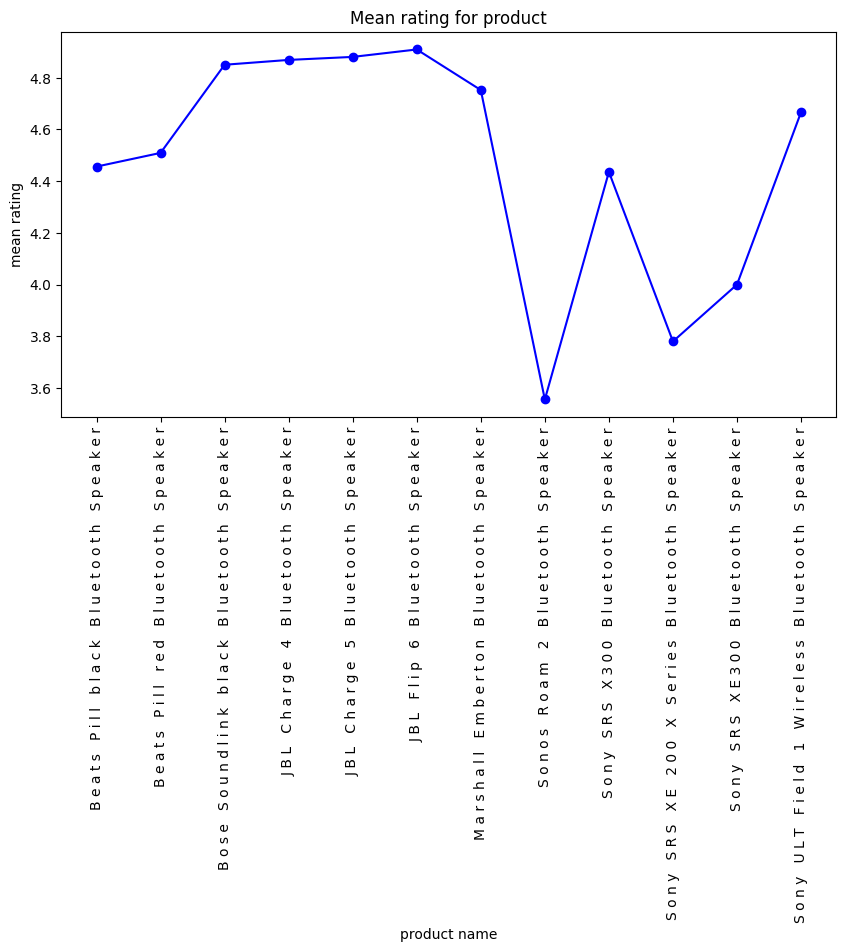

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
reviews_by_rating=data.groupby('product_name').rating.mean()[:20]
x=[' '.join(map(str, item)) for item in reviews_by_rating.index]
y=reviews_by_rating.values.tolist()
plt.figure(figsize=(10,5))
plt.title('Mean rating for product')
plt.xlabel('product name')
plt.ylabel('mean rating')
plt.xticks(labels=x, ticks=np.arange(len(x)), rotation=90)
plt.plot(x,y, color='blue', marker='o')

<BarContainer object of 12 artists>

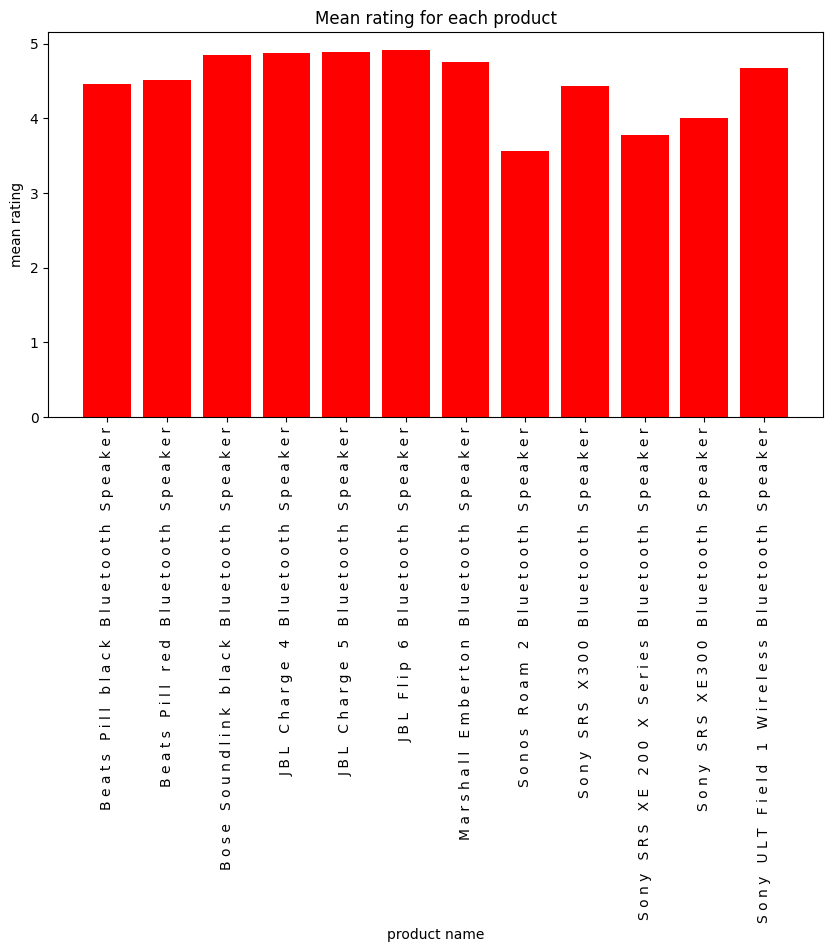

In [ ]:
reviews_by_rating=data.groupby('product_name').rating.mean()
x=[' '.join(map(str, item)) for item in reviews_by_rating.index]
y=reviews_by_rating.values.tolist()
plt.figure(figsize=(10,5))
plt.xlabel('product name')
plt.ylabel('mean rating')
plt.title('Mean rating for each product')
plt.xticks(labels=x, ticks=np.arange(len(x)), rotation=90)
plt.bar(x,y, color='red')

From these two charts, it is evident that JBL, Beats by Dre and Sony are the top performing products based on their ratings and are well accepted by the consumers. JBL remains a powerful competitor despite having 3 products in this particular dataset.

## 4. Sentiment Analysis

### 4.1 Methodology
Sentiment Analysis Tools used:
- Natural Language ToolKit(NLTK)
- Textblob

#### **NLTK**

This is a popular library used for natural language processing. In that analysis of my dataset, NLTK will be used to determine the emotional tone or sentiment of the reviews.

#### **TEXTBLOB**

TextBlob on the other hand simplifies the task of NLTK by measuring the polarity and subjectivity of the text.

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sia=SentimentIntensityAnalyzer()

### 4.2 Results

Results from my analysis below show that Beats has a positive sentiment score, indicating that most consumers are satisfied with the performance, features and quality of the product.

However, there are a few negative reviews and we cannot turn a blind eye to these ones.

In [ ]:
def analyze_sentiments(text):
  sentiment= sia.polarity_scores(text)
  return sentiment

In [ ]:
data['sentiment_scores']=data['content'].apply(analyze_sentiments)
data['neutral_scores']=data['sentiment_scores'].apply(lambda x: x['neu'])
data['positive_scores']=data['sentiment_scores'].apply(lambda x: x['pos'])
data['negative_scores']=data['sentiment_scores'].apply(lambda x: x['neg'])
data['compound_scores']=data['sentiment_scores'].apply(lambda x: x['compound'])

In [ ]:
print(data.head())

   Unnamed: 0       review_id  product_id  \
0        1000  R3ED0R4VCG7DP7  B0CXL4FQBK   
1        1001   R7FS5ZX9N85YV  B0CXL4FQBK   
2        1002  R3MI1MH02YEDHK  B0CXL4FQBK   
3        1003  R26O4F9FKNIYVG  B0CXL4FQBK   
4        1004  R1SSV73W8JIH5E  B0CXL4FQBK   

                                               title        author  rating  \
0   5.0 out of 5 stars Amazing Speaker for All Needs         Colin       5   
1  5.0 out of 5 stars Concert Ready! Nice For the...    Melly Mel3       5   
2  5.0 out of 5 stars Things I wish I knew before...           Pat       5   
3                   4.0 out of 5 stars Easy to pair.      Joseph C       4   
4  5.0 out of 5 stars Didn't expect the sound qua...  Mike Freeman       5   

                                             content  \
0  I was in need of a new versatile portable spea...   
1  Color is as pictured. So pretty and vibrant.Ch...   
2  The media could not be loaded. So, yes 5 stars...   
3  Not a Bose flex link. But good fo

In [ ]:
product_name = "Beats Pill red Bluetooth Speaker"
product_data = data[data['product_name'] == product_name]

compound_scores = product_data['compound_scores']

print(compound_scores)
print(f"Compound scores for {product_name}:", compound_scores)

645    0.9948
646    0.9851
647    0.9898
648    0.9681
649    0.9423
650    0.9524
651    0.8620
652    0.5719
653    0.9847
654    0.8290
655    0.8514
656    0.8687
657    0.9371
658    0.7506
659    0.6249
660    0.8999
661    0.8588
662    0.6249
663    0.8834
664    0.6249
665    0.4404
666    0.0000
667    0.7351
668    0.2748
669    0.7501
670    0.2263
671    0.5859
672    0.3749
673    0.1280
674    0.0000
675    0.0000
676   -0.9798
677    0.9812
678    0.9991
679    0.9897
680    0.9948
681    0.9933
682    0.9781
683    0.8513
684    0.9388
685    0.8855
686    0.9307
687    0.9885
688    0.9792
689    0.9325
690    0.9465
691    0.9731
692    0.9851
693    0.9748
694   -0.3840
695    0.0000
696    0.9381
697    0.9534
698   -0.1012
699    0.8299
Name: compound_scores, dtype: float64
Compound scores for Beats Pill red Bluetooth Speaker: 645    0.9948
646    0.9851
647    0.9898
648    0.9681
649    0.9423
650    0.9524
651    0.8620
652    0.5719
653    0.9847
654    0.829

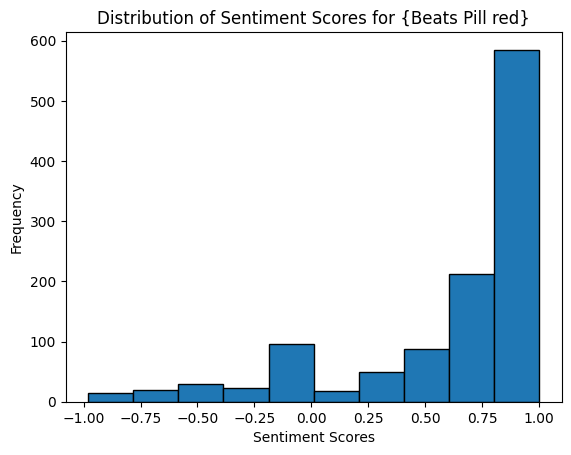

In [ ]:
product_name = "Beats Pill red Bluetooth Speaker"
product_data = data[data['product_name'] == product_name]

compound_scores = product_data['compound_scores']
plt.hist(data['compound_scores'], bins=10, edgecolor='black')
plt.xlabel('Sentiment Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores for {Beats Pill red}')
plt.show()

In [ ]:
product_name = "Beats Pill red Bluetooth Speaker"
product_data = data[data['product_name'] == product_name]
average_sentiment = product_data['sentiment_score'].mean()
print(f"Average Sentiment Score for {product_name}: {average_sentiment}")

Average Sentiment Score for Beats Pill red Bluetooth Speaker: 0.6927054545454546


In [ ]:
if average_sentiment >= 0.05:
    sentiment_category = "Positive"
elif average_sentiment <= -0.05:
    sentiment_category = "Negative"
else:
    sentiment_category = "Neutral"

print(f"Sentiment Category for {product_name}: {sentiment_category}")

Sentiment Category for Beats Pill red Bluetooth Speaker: Positive


## 5. AI-Generated Insights

### 5.1 Using Gemini AI
Gemini AI uses natural language processing and machine learning to analyze large amounts of text data and in this context, Gemini analyzed consumer reviews in my dataset and helped identify strengths and weaknesses of Beats by Dre products.

API keys are first of all generated to enable access and authenticate requests to the Gemini API.
These are a few of the codes I used tp generate insights and recommendations using Gemini AI.

In [ ]:
import pandas as pd
import os
import google.generativeai as genai

In [ ]:
os.environ["GEMINI_API_KEY"] = "APIKEY"
data= pd.read_csv('sentiment_analysis.csv')

def analyze_reviews(reviews,api_key):
  genai.configure(api_key=os.environ['GEMINI_API_KEY'])

  model= genai.GenerativeModel(
    model_name='gemini-1.5-flash',
    generation_config={
      'temperature':1,
      'top_p':0.95,
      'top_k':64,
      'max_output_tokens':8192,
      'response_mime_type':'text/plain',
    },
  )
  chat_session = model.start_chat(
    history=[]
  )
prompt='Give a brief suggestion on what Beats can do to ensure consumer satisfaction and remain competitive in the market:\n\n'+'\n\n'.join(data['content'])
response = chat_session.send_message(prompt)

print(response.text)

In [ ]:
prompt='Analyze the reviews in this data set and provide recommendations for Beats Pill Bluetooth Speaker:\n\n'+'\n\n'.join(data['content'])
response = chat_session.send_message(prompt)
print(response.text)

### 5.2 Key Insights
Using the Gemini AI, I was able to use the following prompts to generate insights.

1. Analyze the reviews and provide recommendations for Beats Pill.
2. Compare Beats Pill with other products and suggest recommendations for Beats
3. Give recommendations for Beats to enhance consumer satisfaction and remain competitive in the market.

---
Gemini AI highlighted that Beats Pill according to consumer reviews and ratings is quite an impressive product. However, it drew attention to the "bass-heavy sound" feature of the product, which mwy not be suitable for those who prefer a balanced audio profile. Most of Beats' negative reviews and ratings came from this aspect.

AI, also highlighted that JBL and Sony could be powerful competition, considering how well consumers have accepted their products. These products have advanced EQ customization which Beats Pill is lacking.

## 6. Comparative Analysis

### 6.1 Competitor Overview
According to my analysis, JBL is a strong competitor. A lot of reviews in this dataset are in favor of JBL. JBL provides a better and balanced audio profile compared to Beats. Howvwe, Beats can boast of longer lasting battery, despite its portability and seamless pairing with both android and ios devices.

### 6.2 SWOT Analysis
STRENGTHS:

- Powerful bass
- Loud volume and ability to fill a room or outdoor space with sound
- Portability
- Water resistant

WEAKNESSES:

- Slightly bass-heavy sound. Might be an issue for consumers who like balanced sound.
- Limited control

OPPORTUNITIES:

- Considering the rise of smart homes, Beats could make speakers that seamlessly integrate with home automation systems.
- Address the threat of piracy and fake products.
- Expand online presence


## 7. Conclusion
In conclusion, Beats is well appreciated by the consumers. Beats Pill posesses unique features that make then stand out in the market. We should continue to make consumer satisfaction our priority.

## 8. References and Tools
- Amazon E-commerce website (www.amazon.com)
- Oxylabs API
- Python
- Beats by Dre website
